In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data Based on Work Tasks
np.random.seed(42)
n_samples = 100

# Features based on actual work experience
product_reviews = np.random.randint(5, 50, n_samples)
troubleshooting_hours = np.random.uniform(1, 10, n_samples)
deployments_tested = np.random.randint(1, 20, n_samples)
db_queries_handled = np.random.randint(10, 100, n_samples)

# Simulate a target: product quality score (out of 100), adding some noise
product_quality_score = (
    0.3 * product_reviews +
    0.2 * troubleshooting_hours +
    0.25 * deployments_tested +
    0.15 * db_queries_handled +
    np.random.normal(0, 5, n_samples)  # noise
)

# Step 2: Construct Design Matrix
X = np.column_stack((product_reviews, troubleshooting_hours, deployments_tested, db_queries_handled))
y = product_quality_score

# Convert to DataFrame for better visualization (optional)
feature_names = ['product_reviews', 'troubleshooting_hours', 'deployments_tested', 'db_queries_handled']
df = pd.DataFrame(X, columns=feature_names)
df['product_quality_score'] = y

# Step 3: Preprocess - Normalize Features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Optional: Check normalized feature stats
X_df = pd.DataFrame(X_normalized, columns=feature_names)
print(X_df.describe())



       product_reviews  troubleshooting_hours  deployments_tested  \
count     1.000000e+02           1.000000e+02        1.000000e+02   
mean     -1.021405e-16          -3.730349e-16       -3.330669e-17   
std       1.005038e+00           1.005038e+00        1.005038e+00   
min      -1.630851e+00          -1.846662e+00       -1.354970e+00   
25%      -8.758272e-01          -8.621246e-01       -1.026094e+00   
50%      -7.550235e-03          -5.532829e-02       -2.039032e-01   
75%       8.796023e-01           7.508641e-01        1.111602e+00   
max       1.691253e+00           1.878170e+00        1.604916e+00   

       db_queries_handled  
count        1.000000e+02  
mean         7.993606e-17  
std          1.005038e+00  
min         -1.731898e+00  
25%         -9.284601e-01  
50%          1.689178e-01  
75%          6.980108e-01  
max          1.756197e+00  


In [6]:
# !pip install faker
from faker import Faker
import numpy as np
import pandas as pd
import random

fake = Faker()
np.random.seed(42)
random.seed(42)

def generate_pm_qa_backend_data(n=100):
    data = []

    roles = ['Product Manager', 'QA Engineer', 'Backend Developer']
    products = ['Mobile App', 'Web App', 'API Service', 'Internal Tool']
    experience_levels = ['Junior', 'Mid-Level', 'Senior']
    environments = ['Staging', 'Production', 'Development']

    for i in range(n):
        task_id = f"TASK-{1000 + i}"
        role = random.choice(roles)
        product_type = random.choice(products)
        experience = random.choice(experience_levels)
        environment = random.choice(environments)
        
        # Simulate actions
        num_product_reviews = np.random.randint(1, 20) if role == 'Product Manager' else 0
        bugs_found = np.random.randint(1, 15) if role == 'QA Engineer' else np.random.randint(0, 5)
        db_queries_executed = np.random.randint(10, 100) if role == 'Backend Developer' else np.random.randint(0, 20)
        deployments_tested = np.random.randint(1, 10) if role in ['QA Engineer', 'Backend Developer'] else 0
        
        # Time spent depends on role and tasks
        time_spent = (
            0.3 * num_product_reviews +
            0.5 * bugs_found +
            0.2 * db_queries_executed +
            0.4 * deployments_tested +
            np.random.normal(1, 0.5)
        )
        time_spent = round(max(1.0, time_spent), 2)

        # Performance metric (target variable)
        product_quality_score = (
            2.5 * num_product_reviews +
            3.0 * deployments_tested -
            1.5 * bugs_found +
            0.5 * db_queries_executed +
            np.random.normal(0, 5)
        )
        product_quality_score = round(max(0, min(100, product_quality_score)), 2)

        data.append({
            "Task ID": task_id,
            "Role": role,
            "Product Type": product_type,
            "Experience Level": experience,
            "Environment": environment,
            "Product Reviews Conducted": num_product_reviews,
            "Bugs Found": bugs_found,
            "DB Queries Executed": db_queries_executed,
            "Deployments Tested": deployments_tested,
            "Time Spent (hrs)": time_spent,
            "Product Quality Score (%)": product_quality_score
        })

    return pd.DataFrame(data)

# Generate data
df_pmqa = generate_pm_qa_backend_data(100)
df_pmqa.to_csv("daniel.csv", index=False)


In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your custom dataset
df = pd.read_csv("pm_qa_backend_data.csv")

# Define the feature and target
X = df[["Time Spent (hrs)"]].values  # Feature
y = df["Product Quality Score (%)"].values  # Target

# Print the full dataset (optional)
print(df)

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the feature
X_realnormalized = scaler.fit_transform(X)

# Optionally print the first 5 normalized values
print("Normalized Feature (X):", X_realnormalized[:5])

# Optionally print first 5 raw values
# print("Feature (X):", X[:5])
# print("Target (y):", y[:5])


      Task ID               Role   Product Type Experience Level  Environment  \
0   TASK-1000  Backend Developer     Mobile App           Junior  Development   
1   TASK-1001        QA Engineer        Web App           Junior      Staging   
2   TASK-1002  Backend Developer     Mobile App           Senior  Development   
3   TASK-1003  Backend Developer     Mobile App           Senior   Production   
4   TASK-1004    Product Manager     Mobile App           Junior      Staging   
..        ...                ...            ...              ...          ...   
95  TASK-1095  Backend Developer    API Service           Senior   Production   
96  TASK-1096        QA Engineer     Mobile App           Junior  Development   
97  TASK-1097        QA Engineer    API Service           Junior      Staging   
98  TASK-1098        QA Engineer        Web App           Senior   Production   
99  TASK-1099    Product Manager  Internal Tool           Senior  Development   

    Product Reviews Conduct

In [16]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load your custom dataset
df = pd.read_csv("daniel.csv")

# Select feature and target
X = df[["Time Spent (hrs)"]].values
y = df["Product Quality Score (%)"].values

# Normalize feature
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Define prediction function
def predict(X, w, b):
    return w * X + b

# Define cost functions
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Try different weights and biases
params_list = [(1.5, 0.5), (2.0, 1.0), (1.0, 0.0)]

# Evaluate each pair
for w, b in params_list:
    y_pred = predict(X_normalized, w, b).flatten()
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    print(f"w = {w}, b = {b} => MSE = {mse:.4f}, MAE = {mae:.4f}")

w = 1.5, b = 0.5 => MSE = 992.5784, MAE = 26.7616
w = 2.0, b = 1.0 => MSE = 954.1715, MAE = 26.2996
w = 1.0, b = 0.0 => MSE = 1031.9854, MAE = 27.2454


   Time Spent (hrs)  Normalized Time Spent  Product Quality Score (%)
0          4.370861              -0.323112                  31.292404
1          9.556429               1.623434                  64.502943
2          7.587945               0.884509                  53.849705
3          6.387926               0.434049                  28.814933
4          2.404168              -1.061365                  15.071799

Optimized weight (w): 15.2305
Optimized bias (b): 31.7572
Final MSE: 81.8164


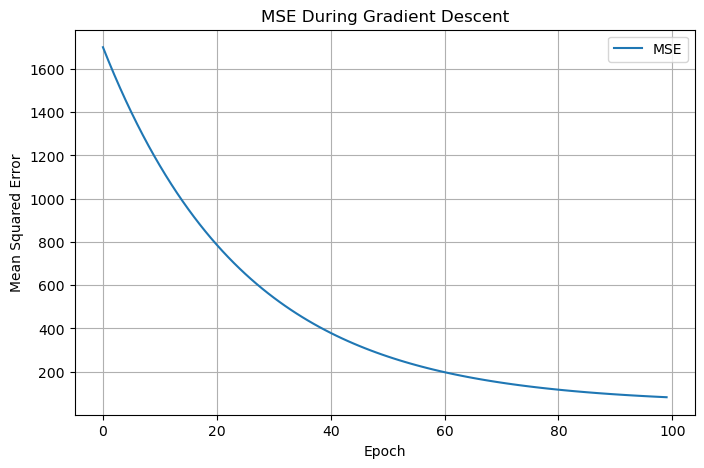

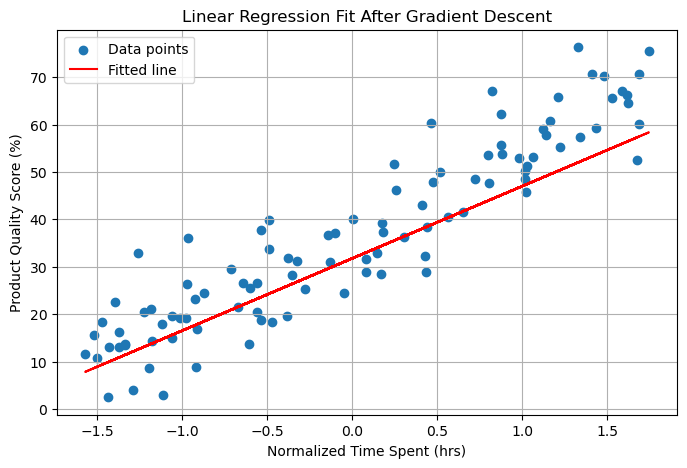

In [17]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data
np.random.seed(42)  # Reproducibility

# Generate feature: Time spent on product tasks (1 to 10 hours)
n_samples = 100
time_spent = np.random.uniform(1, 10, n_samples)

# Simulate target: Product Quality Score with noise
product_quality_score = 7 * time_spent + np.random.normal(0, 8, n_samples)

# Clip product quality to 0–100%
product_quality_score = np.clip(product_quality_score, 0, 100)

# Step 2: Construct Design Matrix
X = time_spent.reshape(-1, 1)  # Feature matrix
y = product_quality_score      # Target vector

# Step 3: Normalize the Feature
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X).flatten()

# Optional: Combine into a DataFrame
df = pd.DataFrame({
    'Time Spent (hrs)': time_spent,
    'Normalized Time Spent': X_normalized,
    'Product Quality Score (%)': product_quality_score
})

print(df.head())

# ----------------------------
# Activity: Gradient Descent
# ----------------------------

# Initialize parameters
w = 0.0
b = 0.0
learning_rate = 0.01
epochs = 100
m = len(X_normalized)
mse_history = []

for epoch in range(epochs):
    y_pred = w * X_normalized + b
    error = y_pred - y
    mse = np.mean(error ** 2)
    mse_history.append(mse)

    # Gradients
    dw = (2/m) * np.dot(error, X_normalized)
    db = (2/m) * np.sum(error)

    # Update weights
    w -= learning_rate * dw
    b -= learning_rate * db

# Results
print(f"\nOptimized weight (w): {w:.4f}")
print(f"Optimized bias (b): {b:.4f}")
print(f"Final MSE: {mse_history[-1]:.4f}")

# Plot MSE over epochs
plt.figure(figsize=(8, 5))
plt.plot(range(epochs), mse_history, label='MSE')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE During Gradient Descent')
plt.grid(True)
plt.legend()
plt.show()

# Plot fit
plt.figure(figsize=(8, 5))
plt.scatter(X_normalized, y, label='Data points')
plt.plot(X_normalized, w * X_normalized + b, color='red', label='Fitted line')
plt.xlabel('Normalized Time Spent (hrs)')
plt.ylabel('Product Quality Score (%)')
plt.title('Linear Regression Fit After Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()

Trained parameters: w = 11.7434, b = 23.5467
Test MSE: 170.2714
Test MAE: 10.9650


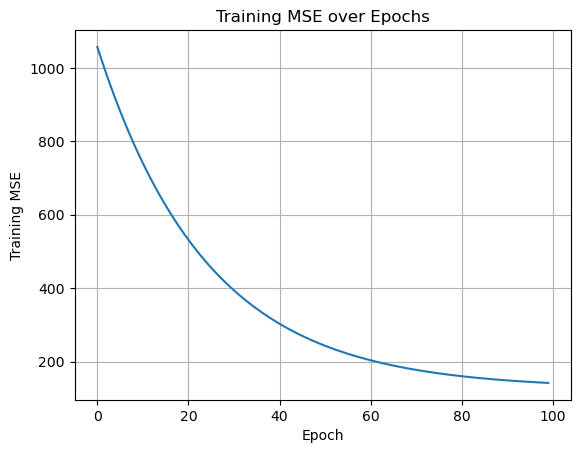

In [18]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Step 1: Load your dataset
df = pd.read_csv("daniel.csv")

# Select feature and target
X = df[["Time Spent (hrs)"]].values.reshape(-1, 1)
y = df["Product Quality Score (%)"].values

# Normalize feature
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X).flatten()

# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

m_train = len(X_train)
mse_history = []

# Initialize parameters
w = 0.0
b = 0.0
learning_rate = 0.01
epochs = 100

# Gradient descent loop
for epoch in range(epochs):
    y_pred_train = w * X_train + b
    error_train = y_pred_train - y_train
    mse = np.mean(error_train ** 2)
    mse_history.append(mse)

    # Gradients
    dw = (2/m_train) * np.dot(error_train, X_train)
    db = (2/m_train) * np.sum(error_train)

    # Update weights
    w -= learning_rate * dw
    b -= learning_rate * db

# Test set evaluation
y_pred_test = w * X_test + b
test_errors = y_pred_test - y_test

# Metrics
mse_test = np.mean(test_errors ** 2)
mae_test = np.mean(np.abs(test_errors))

# Results
print(f"Trained parameters: w = {w:.4f}, b = {b:.4f}")
print(f"Test MSE: {mse_test:.4f}")
print(f"Test MAE: {mae_test:.4f}")

# Plot MSE during training
plt.plot(range(epochs), mse_history)
plt.xlabel('Epoch')
plt.ylabel('Training MSE')
plt.title('Training MSE over Epochs')
plt.grid(True)
plt.show()